La fecha de hoy es 2021-10-07, la cual corresponde al dia numero 280 del presente año. La hora actual es 17 horas con 1 minutos y 11 segundos.
La posicion solar para este instante esta definido por un angulo de altitud igual a: 8.04 grados y un angulo de azimuth igual a: 265.98 grados.
En este dia el sol saldra a las 5:52:47
En este dia el sol se ocultara a las 18:07:12
En este dia el sol estara presente durante 12 horas con 14.41 minutos y 24.81 segundos


<IPython.core.display.Javascript object>


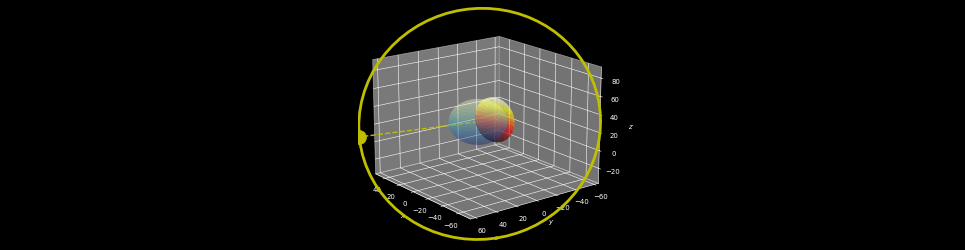

94.0187779539192 rojo hora Z
188.0396998185448 azul anti Y


<IPython.core.display.Javascript object>


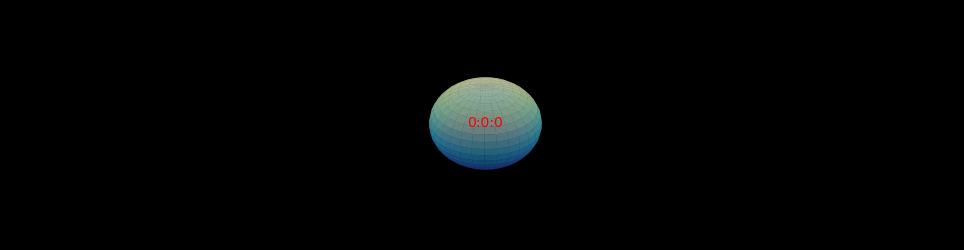

<IPython.core.display.Javascript object>


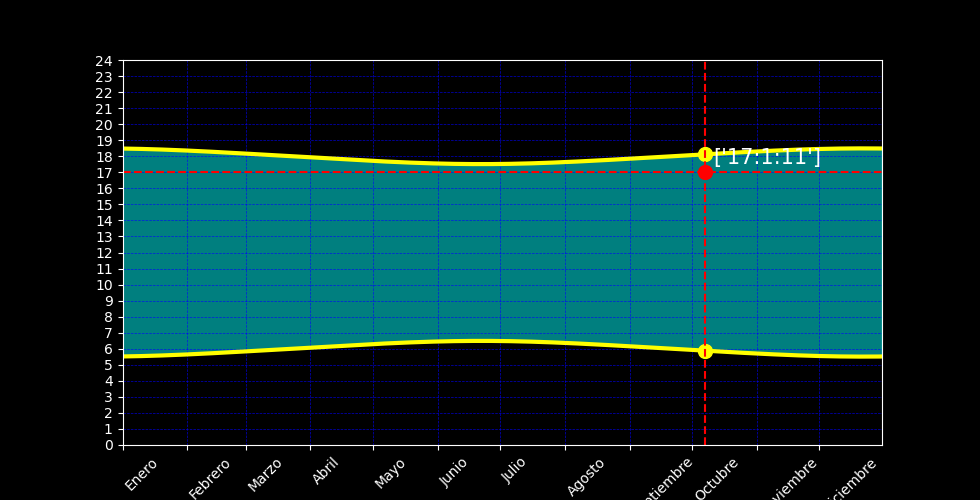

<IPython.core.display.Javascript object>


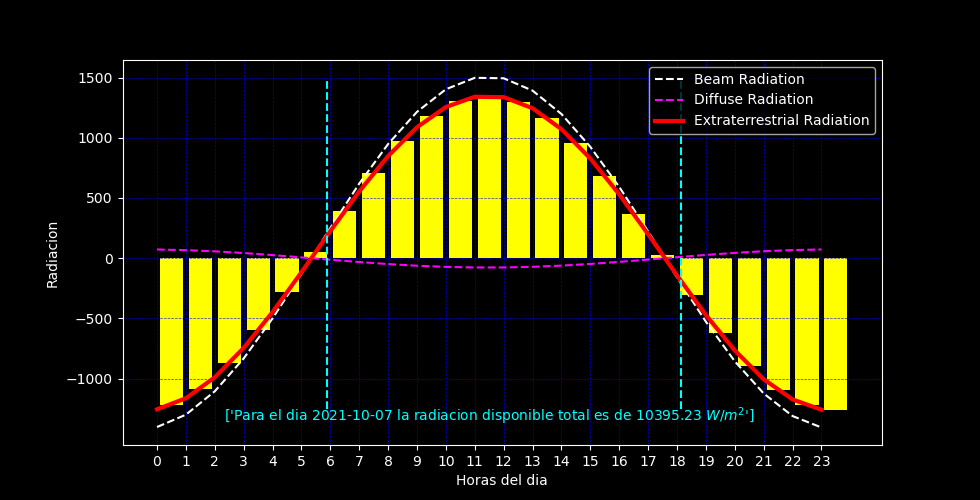

In [31]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from datetime import date
from datetime import datetime
plt.style.use('dark_background')

# -------------------------------------------------------------------------------------------------------------------------

# |-------------------------------|
# |  Latitud and longitude angle  |
# |-------------------------------|

lat = -16.41833 # Latitu del lugar
lon = -71.48554 # Longitud del lugar
msm = 2.405 # km
ndd = 73 # Cantidad de angulos de posicion solar a calcular durante el presente dia

# Solar Time
hoy = date.today()
hor = datetime.now().hour
mnt = datetime.now().minute
sec = datetime.now().second
doy = datetime.now().timetuple().tm_yday
c0  = ((doy - 1) * 360) / 365
c1  = 229.2 * (0.000075 + 0.001868 * np.cos(c0 * np.pi/180) - 0.032077 * np.sin(c0 * np.pi/180) - 0.014615 * np.cos(2 * c0 * np.pi/180) - 0.04089 * np.sin(2 * c0 * np.pi/180))
c2  = (4 * 5 + c1) / 60
h   = hor + mnt/60 + sec/3600 + c2
w   = 15 * (h - 12) # grados

# Declination angle
gam = np.arcsin(0.39795 * np.cos(0.98563 * (doy - 173) * np.pi/180)) * 180/np.pi

# Other method
#gam1 = 23.45 * np.sin(360 * ((284 + doy) / 365) * np.pi/180)
#alt1 = np.arcsin(np.cos(lat * np.pi/180) * np.cos(gam1 * np.pi/180) * np.cos(w * np.pi/180) + np.sin(lat * np.pi/180) * np.sin(gam1 * np.pi/180)) * 180/np.pi
#azi1 = np.arcsin((np.cos(gam1 * np.pi/180) * np.sin(w * np.pi/180)) / np.cos(alt1 * np.pi/180)) * 180/np.pi 

# Sun altitude angle
alt = np.arcsin(np.sin(gam * np.pi/180) * np.sin(lat * np.pi/180) + np.cos(gam * np.pi/180) * np.cos(lat * np.pi/180) * np.cos(w * np.pi/180)) * 180/np.pi

# Zenith angle
zen = 90 - alt

# Azimuth angle
A   = np.arccos((np.sin(gam * np.pi/180) * np.cos(lat * np.pi/180) - np.cos(gam * np.pi/180) * np.sin(lat * np.pi/180) * np.cos(w * np.pi/180)) / np.cos(alt * np.pi/180)) * 180/np.pi
if np.sin(w  * np.pi/180) > 0:
    azi = 360 - A
else:
    azi = A
    
# Time of sunset and sunrise
ws  = np.arccos(-np.tan(gam * np.pi/180) * np.tan(lat * np.pi/180)) * 180/np.pi
hol = (2 * ws) / 15
sns = ws/15 + 12
Sns = sns
snr = sns - hol
Snr = snr

# Results
snrh= int(snr)
snrm= (snr*60) % 60
snrs= (snr*3600) % 60
snsh= int(sns)
snsm= (sns*60) % 60
snss= (sns*3600) % 60
holh= int(hol)
holm= (hol*60) % 60
hols= (hol*3600) % 60
print(f"La fecha de hoy es {hoy}, la cual corresponde al dia numero {doy} del presente año. " 
      f"La hora actual es {hor} horas con {mnt} minutos y {sec} segundos.")
print(f"La posicion solar para este instante esta definido por un angulo de altitud igual a: {alt:0.2f} "
      f"grados y un angulo de azimuth igual a: {azi:0.2f} grados.")
print("En este dia el sol saldra a las %d:%02d:%02d" % (snrh, snrm, snrs))
print("En este dia el sol se ocultara a las %d:%02d:%02d" % (snsh, snsm, snss))
print(f"En este dia el sol estara presente durante {holh} horas con {holm:0.2f} minutos y {hols:0.2f} segundos")

# -------------------------------------------------------------------------------------------------------------------------

# |------------------------------------------------------------|
# |  Funcion para mantener la relacion de los ejes iguales 3D  |
# |------------------------------------------------------------|

def set_axes_equal(ax):

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# -------------------------------------------------------------------------------------------------------------------------

# |--------------------------------------------------------------------------|
# |  Calculo de las entradas y salidas del sol durante todo el presente año  |
# |--------------------------------------------------------------------------|

# Calculo de las entradas y salidas del sol durante todo el presente año
hol  = np.zeros(365)
sns  = np.zeros(365)
snr  = np.zeros(365)
Res  = []
Horr = []
Hors = []
Horh = []

# print(f'|   Fecha    |  Sunrise  |  Sunset  | Duracion |\n------------------------------------------------')
for d in range(1,366):
# Adjusting day num    
    day_num = str(d)
    day_num.rjust(3 + len(day_num), '0')
    res = str(datetime.strptime("2021" + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y"))
    Res.append(res)
    
# Declination angle
    gam = np.arcsin(0.39795 * np.cos(0.98563 * (d - 173)  * np.pi/180)) * 180/np.pi
    
# Time of sunset and sunrise
    ws  = np.arccos(-np.tan(gam  * np.pi/180) * np.tan(lat  * np.pi/180)) * 180/np.pi
    hol[d-1] = (2 * ws) / 15
    sns[d-1] = ws/15 + 12
    snr[d-1] = sns[d-1] - hol[d-1]

# Results    
    snrh = int(snr[d-1])
    snrm = (snr[d-1]*60) % 60
    snrs = (snr[d-1]*3600) % 60
    snsh = int(sns[d-1])
    snsm = (sns[d-1]*60) % 60
    snss = (sns[d-1]*3600) % 60
    holh = int(hol[d-1])
    holm = (hol[d-1]*60) % 60
    hols = (hol[d-1]*3600) % 60
    horr = "%0.0f" % snrh + ':' + "%0.0f" % snrm + ':' + "%0.0f" % snrs
    Horr.append(horr)
    hors = "%0.0f" % snsh + ':' + "%0.0f" % snsm + ':' + "%0.0f" % snss
    Hors.append(hors)
    horh = "%0.0f" % holh + ':' + "%0.0f" % holm + ':' + "%0.0f" % hols
    Horh.append(horh)
#     print(f'| {Res[d-1]:8} | {Horr[d-1]:9} | {Hors[d-1]:8} | {Horh[d-1]:8} |\n------------------------------------------------')
    
# Download data anual
np.savetxt('data1.csv', [p for p in zip(Res, Horr, Hors, Horh)], delimiter=',', fmt='%s')    

# -------------------------------------------------------------------------------------------------------------------------

# |----------------------------------------------------------|
# |  Calculo de los angulos solares durante el presente dia  |
# |----------------------------------------------------------|

# doy = datetime.now().timetuple().tm_yday
hr  = np.linspace(0,24,ndd)
Alt = np.zeros(len(hr))
Azi = np.zeros(len(hr))
Hor = []
i   = -1
# c0  = ((doy - 1) * 360) / 365
# c1  = 229.2 * (0.000075 + 0.001868 * np.cos(c0 * np.pi/180) - 0.032077 * np.sin(c0 * np.pi/180) - 0.014615 * np.cos(2 * c0 * np.pi/180) - 0.04089 * np.sin(2 * c0 * np.pi/180))
# c2  = (4 * 5 + c1) / 60

for h in hr:
    i = i + 1
    w = 15 * (h + c2 - 12) # grados

# Declination angle
    gam = np.arcsin(0.39795 * np.cos(0.98563 * (doy - 173)  * np.pi/180)) * 180/np.pi

# Sun altitude angle
    Alt[i] = np.arcsin(np.sin(gam  * np.pi/180) * np.sin(lat  * np.pi/180) + np.cos(gam * np.pi/180) * np.cos(lat * np.pi/180) * np.cos(w * np.pi/180)) * 180/np.pi

# Azimuth angle
    A   = np.arccos((np.sin(gam  * np.pi/180) * np.cos(lat  * np.pi/180) - np.cos(gam * np.pi/180) * np.sin(lat * np.pi/180) * np.cos(w * np.pi/180)) / np.cos(Alt[i] * np.pi/180)) * 180/np.pi
    if np.sin(w  * np.pi/180) > 0:
        Azi[i] = 360 - A
    else:
        Azi[i] = A

# # Time of sunset and sunrise
#     ws  = np.arccos(-np.tan(gam  * np.pi/180) * np.tan(lat  * np.pi/180)) * 180/np.pi
#     hol = (2 * ws) / 15
#     sns = ws/15 + 12
#     snr = sns - hol
    
# j = -1 
# print(f'|   Hora   |  Azimuth  |  Altitud  |\n------------------------------------')
for j in range(0,i+1):
    time    = hr[j]
    hours   = int(time)
    minutes = (time*60) % 60
    seconds = (time*3600) % 60
    hor     = "%0.0f" % hours + ':' + "%0.0f" % minutes + ':' + "%0.0f" % seconds
    Hor.append(hor)
#     print(f'| {Hor[j]:8} | {Azi[j]:9.2f} | {Alt[j]:9.2f} |\n------------------------------------')
# Download
np.savetxt('data2.csv', [p for p in zip(Hor, Azi, Alt)], delimiter=',', fmt='%s')

## -------------------------------------------------------------------------------------------------------------------------

# |-------------------------------------------------------------|
# |  Grafica del seguimiento del concentrador solar parabolico  |
# |-------------------------------------------------------------|

# azi = 57
# alt = 165

height_z = 24
radius   = 24
# rota_azi = azi # rojo zy hora Z
rota_azi = 360 - azi # rojo zy hora Z
rota_alt = alt + 180 # azul xz anti Y

elements = 30
# rota_alt = -180 - rota_alt
# rota_azi = -rota_azi
center_x = height_z * np.cos(rota_alt * np.pi/180) * np.cos(rota_azi * np.pi/180)
center_y = height_z * np.cos(rota_alt * np.pi/180) * np.sin(rota_azi * np.pi/180)
center_z = height_z * np.sin(rota_alt * np.pi/180)

# center_X = 5 * height_z * np.cos(alt * np.pi/180) * np.cos((azi) * np.pi/180)
# center_Y = 5 * height_z * np.cos(alt * np.pi/180) * np.sin((azi) * np.pi/180)
center_X = 5 * height_z * np.cos(alt * np.pi/180) * np.cos((360 - azi) * np.pi/180)
center_Y = 5 * height_z * np.cos(alt * np.pi/180) * np.sin((360 - azi) * np.pi/180)
center_Z = 5 * height_z * np.sin(alt * np.pi/180)

theta    = np.linspace(0, 2*np.pi, elements)
x_circle = height_z * np.cos(theta)
y_circle = height_z * np.sin(theta)

radius   = np.linspace(0, radius, elements)
z        = (radius ** 2) / (4 * height_z)
theta_grid, z_grid = np.meshgrid(theta, z)
x_grid             = [radius[i] * np.cos(theta_grid)[i][:] for i in range(0,elements)]
y_grid             = [radius[i] * np.sin(theta_grid)[i][:] for i in range(0,elements)]
x_grid   = np.array(x_grid)
y_grid   = np.array(y_grid)

rotation = -rota_alt - 90
mx = np.array([[1, 0, 0], [0, np.cos(rotation * np.pi/180), -np.sin(rotation * np.pi/180)], [0, np.sin(rotation * np.pi/180), np.cos(rotation * np.pi/180)]])
my = np.array([[np.cos(rotation * np.pi/180), 0, np.sin(rotation * np.pi/180)], [0, 1, 0], [-np.sin(rotation * np.pi/180), 0, np.cos(rotation * np.pi/180)]])
mz = np.array([[np.cos(rotation * np.pi/180), -np.sin(rotation * np.pi/180), 0], [np.sin(rotation * np.pi/180), np.cos(rotation * np.pi/180), 0], [0, 0, 1]])

for i in range(0,elements):
    for j in range(0,elements):
        xr = x_grid[i][j] 
        yr = y_grid[i][j] 
        zr = z_grid[i][j] 
        mc = np.array([xr, yr, zr])
        mr = np.dot(my, mc)
        x_grid[i][j] = mr[0]
        y_grid[i][j] = mr[1]
        z_grid[i][j] = mr[2]

rotation = rota_azi
mx = np.array([[1, 0, 0], [0, np.cos(rotation * np.pi/180), -np.sin(rotation * np.pi/180)], [0, np.sin(rotation * np.pi/180), np.cos(rotation * np.pi/180)]])
my = np.array([[np.cos(rotation * np.pi/180), 0, np.sin(rotation * np.pi/180)], [0, 1, 0], [-np.sin(rotation * np.pi/180), 0, np.cos(rotation * np.pi/180)]])
mz = np.array([[np.cos(rotation * np.pi/180), -np.sin(rotation * np.pi/180), 0], [np.sin(rotation * np.pi/180), np.cos(rotation * np.pi/180), 0], [0, 0, 1]])

for i in range(0,elements):
    for j in range(0,elements):
        xr = x_grid[i][j] 
        yr = y_grid[i][j] 
        zr = z_grid[i][j] 
        mc = np.array([xr, yr, zr])
        mr = np.dot(mz, mc)
        x_grid[i][j] = mr[0]
        y_grid[i][j] = mr[1]
        z_grid[i][j] = mr[2]

x_grid = x_grid + center_x   
y_grid = y_grid + center_y
z_grid = z_grid + height_z + center_z

fig4  = plt.figure(figsize=(19.3,5), dpi= 50)
ax4   = Axes3D(fig4)

u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = height_z * np.cos(u) * np.sin(v)
y = height_z * np.sin(u) * np.sin(v)
z = height_z * np.cos(v) + height_z 
ax4.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, alpha = 0.25)

a = 5 * height_z  * np.cos(Azi * np.pi/180) * np.cos(Alt * np.pi/180)
b = 5 * height_z  * np.sin(Azi * np.pi/180) * np.cos(Alt * np.pi/180)
c = 5 * height_z  * np.sin(Alt * np.pi/180) + height_z
ax4.plot(a, b, c, 'y', lw = 4)

# ax4.plot(x_circle, y_circle, np.repeat(height_z, len(x_circle)), color = (1, 0, 0))
# ax4.plot(x_circle, np.zeros(len(x_circle)), y_circle + height_z, color = (0, 0, 1))
# ax4.plot(np.zeros(len(x_circle)), x_circle, y_circle + height_z, color = (0, 1, 0))
# ax4.plot(height_z, 0, height_z, 'om', markersize=5)
# ax4.plot([0, center_X], [0, center_Y], [height_z, height_z + center_Z], '-r', lw=2)
# ax4.plot(center_x, center_y, height_z + center_z, 'ok', markersize=5)
ax4.plot(0, 0, height_z, 'oc', markersize=10)
ax4.plot([center_x, center_X], [center_y, center_Y], [height_z + center_z, height_z + center_Z], '--y', lw=2)
ax4.plot(center_X, center_Y, height_z + center_Z, 'oy', markersize=20)

ax4.plot_surface(x_grid, y_grid, z_grid, cmap = 'hot', alpha=0.8)
ax4.set_title('Solar Tracker')
ax4.set_xlabel('$x$')
ax4.set_ylabel('$y$')
ax4.set_zlabel('$z$') 
ax4.view_init(elev=15, azim=130) 
set_axes_equal(ax4)
# plt.show()
print(str(rota_azi) + ' rojo hora Z')
print(str(rota_alt) + ' azul anti Y')

# -------------------------------------------------------------------------------------------------------------------------

# |-------------------------------------------------------------|
# |  Grafica del seguimiento del concentrador solar parabolico  |
# |-------------------------------------------------------------|

# GET SOME MATPLOTLIB OBJECTS
fig2 = plt.figure(figsize=(19.3,5), dpi= 50)
ax2  = Axes3D(fig2)

r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax2.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, alpha = 0.5)

label = ax2.text(0, 0, 0, Hor, ha='center', va='center', fontsize=20, color="Red")
ax2.set_title('Solar Tracker')

# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    label.set_text(str(Hor[num]))
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line
 
# THE DATA POINTS
a1 = 25 * r * np.cos(Azi[np.arange(len(Azi)-1,-1,-1)] * np.pi/180) * np.cos(Alt[np.arange(len(Azi)-1,-1,-1)] * np.pi/180)
b1 = 25 * r * np.sin(Azi[np.arange(len(Azi)-1,-1,-1)] * np.pi/180) * np.cos(Alt[np.arange(len(Azi)-1,-1,-1)] * np.pi/180)
c1 = 25 * r * np.sin(Alt[np.arange(len(Azi)-1,-1,-1)] * np.pi/180)
dataSet = np.array([a1, b1, c1])
numDataPoints = len(c1)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=5, c='y')[0] # For line plot

# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=30, azim=150) 

# Creating the Animation object
line_ani = animation.FuncAnimation(fig2, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
ax2.axis('off')
set_axes_equal(ax2)
#line_ani.save(r'D:\Programs\Python\AnimationNew.gif')
 
# from IPython.display import HTML
# HTML(line_ani.to_jshtml()) 
# #plt.show()

# -------------------------------------------------------------------------------------------------------------------------

# |-----------------------------------------------------------------|
# |  Grafica de las salidas y entradas del sol durante todo el año  |
# |-----------------------------------------------------------------|

hoy = date.today()
hor = datetime.now().hour
mnt = datetime.now().minute
sec = datetime.now().second
doy = datetime.now().timetuple().tm_yday

fig, ax = plt.subplots(figsize = (9.8,5))
x1 = np.arange(1,366) 
ax.plot(x1,snr, color = (1, 1, 0), lw = 3)
ax.plot(x1,sns, color = (1, 1, 0), lw = 3)
ax.plot(doy,hor,'or', markersize = 10)
ax.plot(doy,snr[doy],'o', color = (1, 1, 0), markersize = 10)
ax.plot(doy,sns[doy],'o', color = (1, 1, 0), markersize = 10)
ax.plot([doy,doy],[0,24],'--r')
ax.plot([1,365],[hor,hor],'--r')
ax.text(doy+4, hor+0.5, [str(hor)+':'+str(mnt)+':'+str(sec)], fontsize=15)
ax.fill_between(x1, snr, 0, color = (0, 0, 0), alpha = 0.8)
ax.fill_between(x1, sns, 24, color = (0, 0, 0), alpha = 0.8)
ax.fill_between(x1, snr, sns, color = (0, 1, 1), alpha = 0.5)
plt.xlim([1, 365])
plt.ylim([0, 24])
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], months, rotation=45, horizontalalignment='left')
plt.yticks(np.linspace(0,24,25))                  
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5, alpha = 0.8)
# plt.show()

# -------------------------------------------------------------------------------------------------------------------------

# |------------------------------------------------------------------|
# |  Grafica de la radiacion solar incidente y disponible en el dia  |
# |------------------------------------------------------------------|

sca = 1367 * (1 + 0.033 * np.cos(((360 * doy) / 365) * np.pi/180))
a0  = 0.98 * (0.4237 - 0.00821 * (6.0 - msm) ** 2)
a1  = 0.99 * (0.5055 + 0.00595 * (6.5 - msm) ** 2)
a2  = 1.00 * (0.2711 + 0.01858 * (2.5 - msm) ** 2)
rb  = a0 + a1 * np.exp(-a2/(np.cos(lat * np.pi/180) * np.cos(gam * np.pi/180) * np.cos(w * np.pi/180) + np.sin(lat * np.pi/180) * np.sin(gam * np.pi/180)))
rd  = 0.271 - 0.294 * rb
etr = np.zeros(24) # W/m^2
gsb = np.zeros(24) # W/m^2
gsd = np.zeros(24) # W/m^2
ioh = np.zeros(24) # J/m^2 x h
x2  = np.arange(0,24)
for i in x2:
    w1 = 15 * (i + c2 - 12)
    w2 = 15 * (i + 1 + c2 - 12)
    etr[i] = sca * (np.cos(lat * np.pi/180) * np.cos(gam * np.pi/180) * np.cos(w1 * np.pi/180) + np.sin(lat * np.pi/180) * np.sin(gam * np.pi/180))
    gsb[i] = rb * sca * (np.cos(lat * np.pi/180) * np.cos(gam * np.pi/180) * np.cos(w1 * np.pi/180) + np.sin(lat * np.pi/180) * np.sin(gam * np.pi/180))
    gsd[i] = rd * sca * (np.cos(lat * np.pi/180) * np.cos(gam * np.pi/180) * np.cos(w1 * np.pi/180) + np.sin(lat * np.pi/180) * np.sin(gam * np.pi/180))
    ioh[i] = ((12 * 3600) / np.pi) * sca * (np.cos(lat * np.pi/180) * np.cos(gam * np.pi/180) * (np.sin(w2 * np.pi/180) - np.sin(w1 * np.pi/180)) + np.sin(lat * np.pi/180) * np.sin(gam * np.pi/180) * ((w2 - w1) * np.pi/180))
w3  = 15 * (Snr + c2 - 12)
w4  = 15 * (Sns + c2 - 12)
ioa = (((12 * 3600) / np.pi) * sca * (np.cos(lat * np.pi/180) * np.cos(gam * np.pi/180) * (np.sin(w4 * np.pi/180) - np.sin(w3 * np.pi/180)) + np.sin(lat * np.pi/180) * np.sin(gam * np.pi/180) * ((w4 - w3) * np.pi/180)))/3600
ioa = "%0.2f" % ioa 
fig3, ax3 = plt.subplots(figsize = (9.8,5))
ax3.plot(x2,gsb, color = (1, 1, 1), lw = 1.5, label = 'Beam Radiation', linestyle = '--')
ax3.plot(x2,gsd, color = (1, 0, 1), lw = 1.5, label = 'Diffuse Radiation', linestyle = '--')
ax3.plot(x2,etr, color = (1, 0, 0), lw = 3.0, label = 'Extraterrestrial Radiation')
ax3.plot([Snr, Snr],[-1250, 1500], color = (0, 1, 1), lw = 1.5, linestyle = '--')
ax3.plot([Sns, Sns],[-1250, 1500], color = (0, 1, 1), lw = 1.5, linestyle = '--')
ax3.bar(np.arange(0.5,24),ioh/3600, color = (1, 1, 0))
ax3.text(11.5, -1350, ['Para el dia '+str(hoy)+' la radiacion disponible total es de '+str(ioa)+r' ${W}/{m^2}$'], fontsize=10, color = (0, 1, 1), horizontalalignment='center')
ax3.set_xlabel('Horas del dia')
ax3.set_ylabel('Radiacion')
plt.xticks(x2)
plt.yticks(np.linspace(-1000,1500,6))   
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.5, alpha = 0.8)
plt.legend(loc='upper right')
# plt.show()

# -------------------------------------------------------------------------------------------------------------------------

# |---------------------------------------------------------------|
# |  Animacion del seguimiento del concentrador solar parabolico  |
# |---------------------------------------------------------------|

from IPython.display import HTML
HTML(line_ani.to_jshtml()) 
#plt.show()